$$\huge{\text{  Assignment 2 }}$$

$$\huge{\text{Regression with Multiple Inputs and Regularization}}$$

<font size=4>  For this Assignment include a pdf of your Jupyter Notebooks as representation of your code.
    

$\huge{\text{  Names:}}$ Nolan Stelzner

In [2]:
%run packages
%matplotlib inline
np.random.seed(42)

<font size =4>This is  data for this assignmnet is from an Annals of Statistics paper.  [Reference](http://statweb.stanford.edu/~tibs/ftp/lars.pdf)
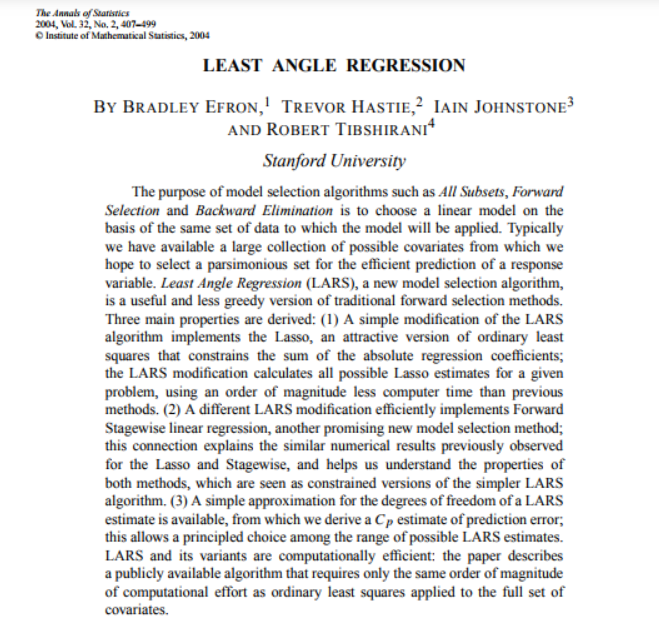

__Here we'll load the data directly from the [web site](https://web.stanford.edu/~hastie/Papers/LARS/diabetes.data)  and take a look?__

In [3]:
diabX = np.loadtxt('https://web.stanford.edu/~hastie/Papers/LARS/diabetes.data',skiprows=1)
diab_web=pd.DataFrame(diabX,columns=['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'Response'])
diab_web

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Response
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0,178.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0,104.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0,132.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0,220.0


## <font color =blue> We will use the diabetes data  from [Scikit_Learn](http://scikit-learn.org/stable/datasets/index.html). Import the dataset and put it into a data frame with the feature names.  Call Data frame diabsk and take a look at it.  It is going to be different than above.

In [4]:
from sklearn import datasets
diabetes = sklearn.datasets.load_diabetes()
x=diabetes.data
y=diabetes.feature_names
diabsk = pd.DataFrame(x,columns = y)
diabsk

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


## <font color =blue> Let's use .describe() on the data set to look at the summary satistics

In [5]:
diabsk.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


## <font color =blue> It is scaled but the standard deviation isn't 1.  Try multiplying the Data Frame by$\sqrt{442}$ and look again. 

In [6]:
dbstd = diabsk*(442**.5)
dbstd.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-7.629392e-15,2.821775e-15,-1.687539e-14,2.756468e-15,-1.897426e-15,2.715525e-15,-9.596145e-15,8.051629e-15,-8.048897e-15,-7.165648e-15
std,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00
min,-2.254290e+00,-9.385367e-01,-1.897929e+00,-2.363066e+00,-2.665411e+00,-2.430626e+00,-2.150883e+00,-1.606102e+00,-2.651046e+00,-2.896390e+00
25%,-7.841722e-01,-9.385367e-01,-7.196249e-01,-7.706577e-01,-7.200196e-01,-6.382488e-01,-7.382960e-01,-8.303008e-01,-6.990157e-01,-6.975491e-01
50%,1.131724e-01,-9.385367e-01,-1.531324e-01,-1.192178e-01,-9.084100e-02,-8.029125e-02,-1.384305e-01,-5.449919e-02,-4.094666e-02,-2.265729e-02
75%,8.005001e-01,1.065488e+00,6.569519e-01,7.493688e-01,5.961931e-01,6.274425e-01,6.162390e-01,7.213025e-01,6.818695e-01,5.869224e-01
max,2.327895e+00,1.065488e+00,3.585718e+00,2.776071e+00,3.235851e+00,4.179278e+00,3.809072e+00,3.894331e+00,2.808758e+00,2.851075e+00


## <font color=blue>Now we divide the data up using  [Sklearns train test split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with a test size of 20%. Call data sets X_train, y_train, X_test and y_test.  Use the data directly from sklearn.  That is don't worry about multiplying by $\sqrt{442}$

In [7]:
x, y = diabetes.data, diabetes.target
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import scale
#xs=scale(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## <font color=blue> Perform a Linear regression using all the features and do a Cross Validation with 5 folds. Print out all the scores and the average of the scores.  

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
reg=linear_model.LinearRegression()
#poly_f=PolynomialFeatures(degree=1,include_bias=False)
#x_poly=poly_f.fit_transform(x_train)
reg.fit(x_train,y_train)

LinearRegression()

In [9]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(reg, x_train, y_train, cv=5, scoring='r2')
print("R^2 for each fold of the cross validation ",cvs)
print("Average of the R^2 scores",np.mean(cvs))

R^2 for each fold of the cross validation  [0.54759978 0.36124047 0.50481994 0.61773064 0.21489378]
Average of the R^2 scores 0.44925692124316763


In [32]:
reg.score(x_test,y_test)

0.452606602161738

In [33]:
reg.score(x_train,y_train)

0.5279198995709651

## <font color=blue>  For Ridge let's do a  GridSearchCV with 5 folds and use$\alpha$ ∈ [0,1,10,20,30].  Find the best $\alpha$ and print the results in a data frame. See Module 3 notebook for help. Just print out 
    
    ["param_alpha","mean_test_score","rank_test_score"]

In [52]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
#from sklearn.preprocessing import scale


params={'alpha': [0,1,10,20,30]}
rdg_reg = Ridge()
rdg = GridSearchCV(rdg_reg,params,cv=5,verbose = 1)

rdg.fit(x_train,y_train)
print("best Alpha",rdg.best_params_,"bestscore",rdg.best_score_)

DF=pd.DataFrame(rdg.cv_results_)
DF[["param_alpha","mean_test_score","rank_test_score"]]

Fitting 5 folds for each of 5 candidates, totalling 25 fits
best Alpha {'alpha': 0} bestscore 0.4492569212431675


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished


,param_alpha,mean_test_score,rank_test_score
0,0,0.449257,1
1,1,0.380243,2
2,10,0.108536,3
3,20,0.049410,4
4,30,0.025556,5


In [53]:
rdg.best_estimator_.score(x_test,y_test)

0.4526066021617381

##  <font color=blue>  For Lasso let's do a  GridSearchCV with 5 folds and use $\alpha$ ∈  [.001,0.01,.1,.2,1].  Find the best $\alpha$ and print the results in a data frame. See Module 3 notebook for help. Just print out 
    
    ["param_alpha","mean_test_score","rank_test_score"]

In [25]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
params={'alpha': [.001,0.01,.1,.2,1]}
lasso_reg = Lasso()
las = GridSearchCV(lasso_reg,params,cv=5,verbose = 0)
las.fit(x_train,y_train)
print("best Alpha",las.best_params_,"bestscore",las.best_score_)
DF = pd.DataFrame(las.cv_results_)
df = DF[["param_alpha","mean_test_score","rank_test_score"]]
df

best Alpha {'alpha': 0.1} bestscore 0.4555117631297468


,param_alpha,mean_test_score,rank_test_score
0,0.001,0.449722,3
1,0.01,0.451665,2
2,0.1,0.455512,1
3,0.2,0.448305,4
4,1,0.323837,5


In [26]:
las.best_estimator_.score(x_test,y_test)

0.4718552616908692

## <font color=blue> Test your best models on the test sets compare them to un-regularized regression( reg.score from above) and discuss the results.

In [47]:
rdg.best_estimator_.score(x_test,y_test)

0.4526066021617381

In [28]:
las.best_estimator_.score(x_test,y_test)

0.4718552616908692

In [35]:
reg.score(x_test,y_test)

0.452606602161738

Looks like lasso model is better than both linear regression and ridge.

##  <font color=blue> How did your best models for Lasso and Ridge compare to the Regression with out regularization on the test sets? Are the $R^2$ values encouraging?  



<font size=4 color =brown> __Answer: Ridge and Linear regression were identical, Lasso was better than both. Although, none of the models were very good overall.__

## <font color=blue> Given the plot of the coefficients of the best models below, which input variables seem to have the most impact on dependent variable?  Explain.  Why does it look like there are only 2 plots?  Can you explain this in connection with the alpha for the best model for Ridge?

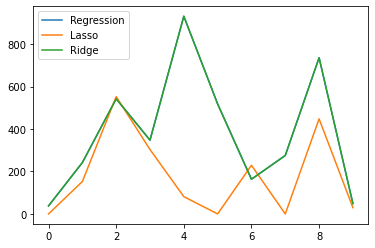

In [48]:
plt.plot(np.abs(reg.coef_.T))
plt.plot(np.abs(las.best_estimator_.coef_.T))
plt.plot(np.abs(rdg.best_estimator_.coef_.T))
plt.legend(['Regression','Lasso','Ridge'])

In [38]:
np.abs(reg.coef_.T)

array([ 37.90031426, 241.96624835, 542.42575342, 347.70830529,
       931.46126093, 518.04405547, 163.40353476, 275.31003837,
       736.18909839,  48.67112488])

In [39]:
np.abs(las.best_estimator_.coef_.T)

array([  0.        , 152.66706552, 552.6941724 , 303.37055083,
        81.3648345 ,   0.        , 229.25829816,   0.        ,
       447.91818931,  29.64235375])

In [40]:
np.abs(rdg.best_estimator_.coef_.T)

array([ 37.90031426, 241.96624835, 542.42575342, 347.70830529,
       931.46126093, 518.04405547, 163.40353476, 275.31003837,
       736.18909839,  48.67112488])

In [36]:
#plt.plot(np.abs(reg.coef_.T))
#plt.plot(np.abs(clfr.best_estimator_.coef_.T))
#plt.plot(np.abs(clfl.best_estimator_.coef_.T))
#plt.legend(['Regression','Lasso','Ridge'])

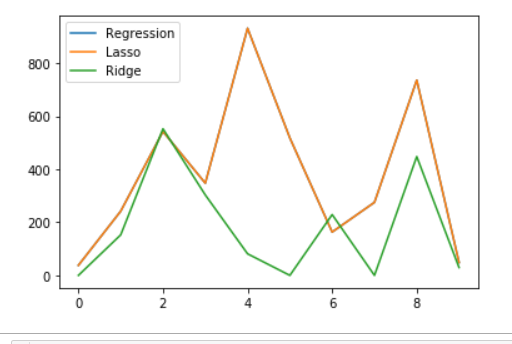

Linear reg and Ridge contain same coefficients = same line. Alpha is 0 so there is no regularization involved. This means it's the same score for both. Lasso contains higher score and is best model. Ridge and lin reg input variables BMI, s1, & s5 deliver most impact to dependent variables while Lasso input variables BMI, s3 & s5 are most important.